In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30, 
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1, 
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [5]:
dataset = generate_dataset()

In [8]:
dataset

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0
5,294,0
6,312,1
7,282,0
8,315,1
9,311,1


<Axes: xlabel='GRE_Score', ylabel='Admission'>

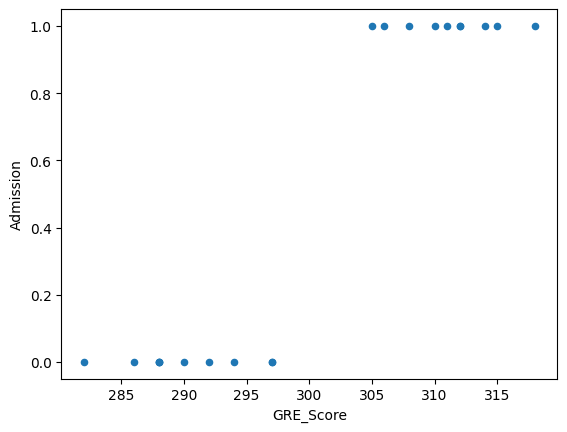

In [3]:
dataset.plot.scatter(x = "GRE_Score",y="Admission")

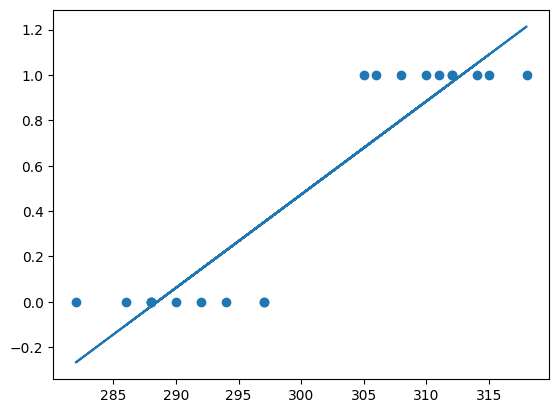

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = dataset.iloc[:, :-1].values #Gre Scores
y = dataset.iloc[:, 1].values #Admission

linreg = LinearRegression()
linreg.fit(x,y)

plt.scatter(x,y)
plt.plot(x,linreg.predict(x)) #Best Fit line

## Logistic Regression

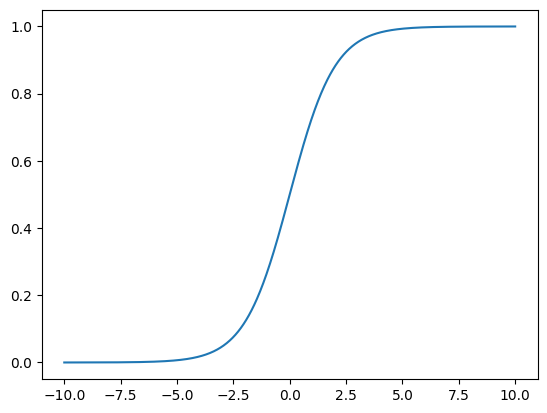

In [11]:
z = np.linspace(-10,10,1000)

def sigmoid(z):
    return 1/ (1+np.exp(-z))

plt.plot(z,sigmoid(z))

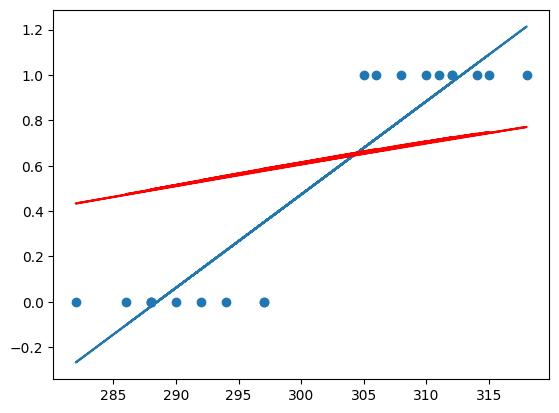

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

linreg = LinearRegression()
linreg.fit(x,y)

plt.scatter(x,y)
plt.plot(x,linreg.predict(x))
plt.plot(x,sigmoid(linreg.predict(x)),color='red')

## Coding Example

### Dataset Description
The dataset has Number 768 sample records of patients. There are 8 features:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction
* Age: Years
  
Using these 8 predictor variables we need to predict the target variable 'Outcome'. It contains binary value: 1 if the patient has diabetes and 0 if the patient doesn't have diabetes.

In [13]:
import pandas as pd

dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome'>

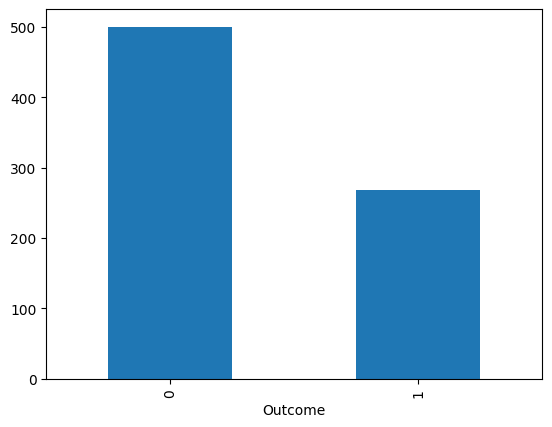

In [15]:
dataset.Outcome.value_counts().plot(kind="bar")

## Data Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [17]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=898, stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(tol=0.01, max_iter=500)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [20]:
y_pred = logistic_regression.predict(X_test)

## Evaluation metrics

* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1-score
  
All of these metrics are available in Scikit-Learn's metrics package for classification.

### Accuracy

Number of Correct Predictions(TP + TN) / Total Number of Predictions (TP + TN + FP + FN)

In [21]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y_test, y_pred) )

0.7604166666666666


### Accuracy Paradox

Accuracy paradox refers to the inability of accuracy metric to correctly measure the performance in case of skewed classes. Classes are skewed if a large number of examples belong to one class and only a small number of examples belong to the other class.

### Precision

True Positive(TP) / Number of Positives Predicted (TP + FP)

In [22]:
from sklearn.metrics import precision_score

print( precision_score(y_test, y_pred))

0.723404255319149


### Recall

True Positive(TP) / Total Number of Actual Positives (TP + FN)

In [23]:
from sklearn.metrics import recall_score

print( recall_score(y_test, y_pred))

0.5074626865671642


## Confusion Matrix

TN (True Negative) is the number of examples that our classifier predicted as negative and are actually negative. 

FN (False Negative) is the number of examples that our classifier predicted as negative but are actually positive.

TP (True Positive) is the number of examples that our classifier predicted as positive and are actually positive.

FP (False Positive) is the number of examples that our classifier predicted as positive but are actually negative.

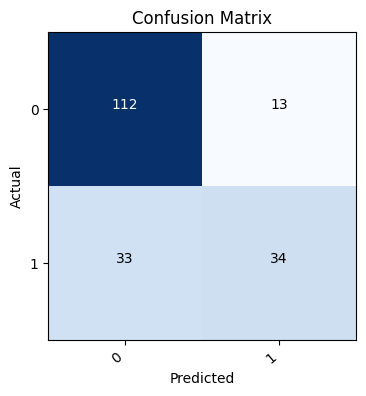

In [27]:
import itertools

from sklearn.metrics import confusion_matrix

labels = y_test.unique()
matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)

fig,ax = plt.subplots(figsize=(12,4))
ax.imshow(matrix, cmap="Blues")
t_hold = (matrix.max() - matrix.min()) / 2.
for row,col in itertools.product(range(len(labels)), range(len(labels))):
    color = "white" if matrix[row,col] > t_hold else "black"
    ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
tick_marks = np.arange(len(labels))
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=40, ha="right")
ax.set_ylabel("Actual")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()

## F1 Score

2 * Precision * Recall / Precision + Recall

In [25]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.5964912280701754


### Increasing Recall

In [28]:
logistic_regression = LogisticRegression(class_weight={0:1, 1:10})
logistic_regression.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [29]:
y_pred = logistic_regression.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y_test, y_pred) )

0.5625


In [31]:
from sklearn.metrics import precision_score

print( precision_score(y_test, y_pred))

0.4413793103448276


In [32]:
from sklearn.metrics import recall_score

print( recall_score(y_test, y_pred))

0.9552238805970149


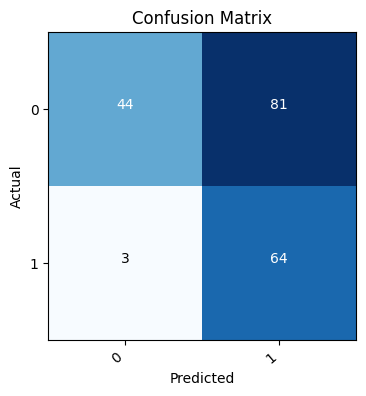

In [33]:
import itertools

from sklearn.metrics import confusion_matrix

labels = y_test.unique()
matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)

fig,ax = plt.subplots(figsize=(12,4))
ax.imshow(matrix, cmap="Blues")
t_hold = (matrix.max() - matrix.min()) / 2.
for row,col in itertools.product(range(len(labels)), range(len(labels))):
    color = "white" if matrix[row,col] > t_hold else "black"
    ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
tick_marks = np.arange(len(labels))
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=40, ha="right")
ax.set_ylabel("Actual")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()